### Load dataset , convert to dataframe and display information about schemas

In [1]:
import pandas as pd
import json

# Load datasets
with open("API endpoint.json") as api_file:
    api_data = json.load(api_file)

with open("quiz endpoint.json") as quiz_file:
    quiz_data = json.load(quiz_file)

with open("quiz submission data.json") as submission_file:
    submission_data = json.load(submission_file)

# Convert to DataFrames for easier analysis
api_df = pd.DataFrame(api_data)
quiz_df = pd.DataFrame([quiz_data])  # Single JSON object
submission_df = pd.DataFrame([submission_data])  # Single JSON object

# Display basic information
print("API Endpoint Data Overview:")
print(api_df.info())
print("\nQuiz Endpoint Data Overview:")
print(quiz_df.info())
print("\nQuiz Submission Data Overview:")
print(submission_df.info())


API Endpoint Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     14 non-null     int64 
 1   quiz_id                14 non-null     int64 
 2   user_id                14 non-null     object
 3   submitted_at           14 non-null     object
 4   created_at             14 non-null     object
 5   updated_at             14 non-null     object
 6   score                  14 non-null     int64 
 7   trophy_level           14 non-null     int64 
 8   accuracy               14 non-null     object
 9   speed                  14 non-null     object
 10  final_score            14 non-null     object
 11  negative_score         14 non-null     object
 12  correct_answers        14 non-null     int64 
 13  incorrect_answers      14 non-null     int64 
 14  source                 14 non-null     object
 1

### Explore the dataset tuples

In [3]:
# Display the first few records of each dataset
print("API Endpoint Data - First 5 Records:")
print(api_df.head())

print("\nQuiz Endpoint Data - First 5 Records:")
print(quiz_df.head())

print("\nQuiz Submission Data - First 5 Records:")
print(submission_df.head())


API Endpoint Data - First 5 Records:
       id  quiz_id                       user_id  \
0  336497       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
1  336448        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
2  333330       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
3  333242        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
4  329504       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   

                    submitted_at                     created_at  \
0  2025-01-17T15:30:18.027+05:30  2025-01-17T15:30:18.044+05:30   
1  2025-01-17T15:17:44.042+05:30  2025-01-17T15:17:44.056+05:30   
2  2025-01-16T20:13:19.682+05:30  2025-01-16T20:13:19.699+05:30   
3  2025-01-16T20:00:11.562+05:30  2025-01-16T20:00:11.573+05:30   
4  2025-01-15T20:34:39.462+05:30  2025-01-15T20:34:39.478+05:30   

                      updated_at  score  trophy_level accuracy speed  ...  \
0  2025-01-17T15:30:18.044+05:30    108             2     90 %   100  ...   
1  2025-01-17T15:17:44.056+05:30     92             1    100 %   100  ...   
2  2025-01-16T20

### EDA (Exploratory Data Analysis)

In [4]:
# Check for missing values
print("API Data - Missing Values:")
print(api_df.isnull().sum())

print("\nQuiz Data - Missing Values:")
print(quiz_df.isnull().sum())

print("\nSubmission Data - Missing Values:")
print(submission_df.isnull().sum())

# Convert date columns to datetime
api_df['submitted_at'] = pd.to_datetime(api_df['submitted_at'])
quiz_df['quiz_time'] = pd.to_datetime(quiz_df['quiz'].apply(lambda x: x['time']))
submission_df['submitted_at'] = pd.to_datetime(submission_df['submitted_at'])


API Data - Missing Values:
id                       0
quiz_id                  0
user_id                  0
submitted_at             0
created_at               0
updated_at               0
score                    0
trophy_level             0
accuracy                 0
speed                    0
final_score              0
negative_score           0
correct_answers          0
incorrect_answers        0
source                   0
type                     0
started_at               0
ended_at                 0
duration                 0
better_than              0
total_questions          0
rank_text                0
mistakes_corrected       0
initial_mistake_count    0
response_map             0
quiz                     0
dtype: int64

Quiz Data - Missing Values:
quiz    0
dtype: int64

Submission Data - Missing Values:
id                       0
quiz_id                  0
user_id                  0
submitted_at             0
created_at               0
updated_at               0
score    

In [5]:
# Analyze average score and accuracy
api_performance = api_df.agg({
    'score': 'mean',
    'accuracy': lambda x: x.str.rstrip(' %').astype(float).mean(),
    'correct_answers': 'mean',
    'incorrect_answers': 'mean'
})
print("Average Performance Metrics:")
print(api_performance)

# Group by quiz/topic for detailed analysis
topic_performance = api_df.groupby('quiz_id').agg({
    'score': 'mean',
    'accuracy': lambda x: x.str.rstrip(' %').astype(float).mean()
}).reset_index()
print("Topic-Level Performance:")
print(topic_performance)


Average Performance Metrics:
score                60.285714
accuracy             72.214286
correct_answers      15.071429
incorrect_answers     5.857143
dtype: float64
Topic-Level Performance:
   quiz_id       score    accuracy
0        6   54.666667   80.000000
1       18   52.000000   92.000000
2       20   12.000000   30.000000
3       24   76.000000  100.000000
4       25  112.000000   93.000000
5       50   24.000000   66.000000
6       51   86.666667   72.333333
7       57   40.000000   38.000000
8       58   52.000000   43.000000


In [8]:
# Check if 'topic' is available
if 'topic' in api_df.columns:
    # Group by topic and calculate average metrics
    topic_performance = api_df.groupby('topic').agg({
        'score': 'mean',
        'accuracy': lambda x: x.str.rstrip(' %').astype(float).mean()
    }).reset_index()

    # Create a pivot table
    topic_performance_pivot = topic_performance.pivot_table(
        index='topic',  # Rows
        values='accuracy'  # Values to plot
    )

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(topic_performance_pivot, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Topic-Wise Accuracy Heatmap")
    plt.ylabel("Topic")
    plt.xlabel("Accuracy")
    plt.show()
else:
    print("The dataset does not contain a 'topic' column.")



The dataset does not contain a 'topic' column.


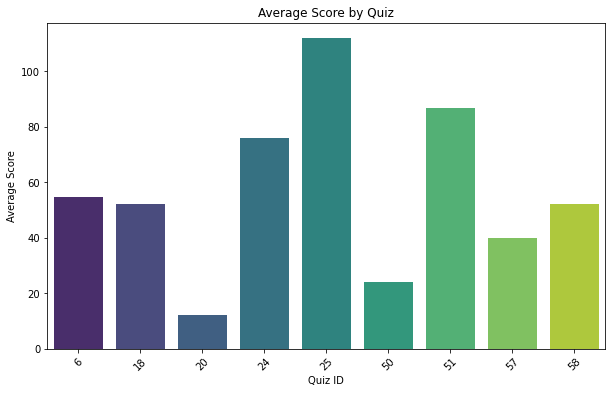

In [10]:


# Bar chart for average score by quiz
plt.figure(figsize=(10, 6))
sns.barplot(data=topic_performance, x='quiz_id', y='score', palette='viridis')
plt.title("Average Score by Quiz")
plt.xticks(rotation=45)
plt.ylabel("Average Score")
plt.xlabel("Quiz ID")
plt.show()


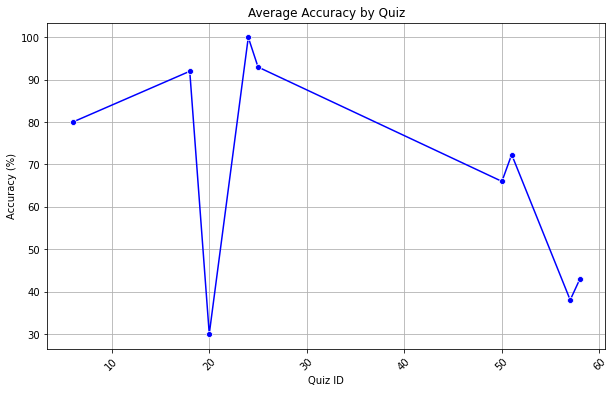

In [11]:
# Line chart for accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(data=topic_performance, x='quiz_id', y='accuracy', marker='o', color='blue')
plt.title("Average Accuracy by Quiz")
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.xlabel("Quiz ID")
plt.grid(True)
plt.show()


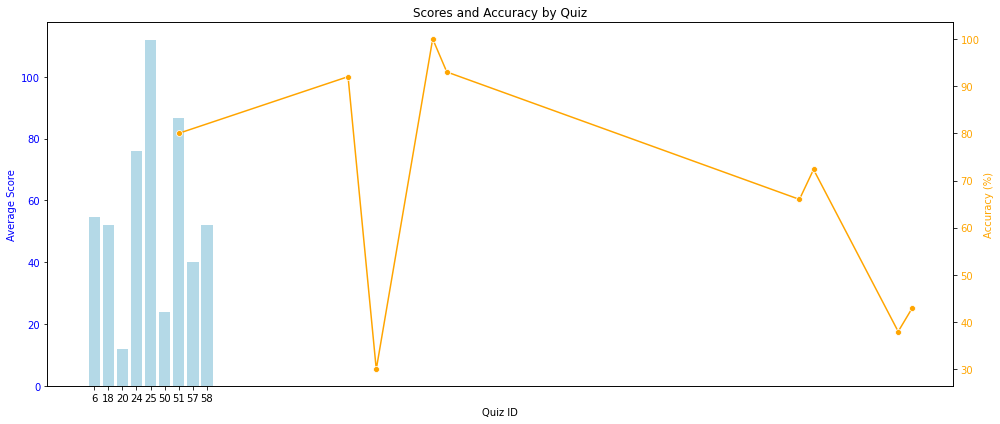

In [12]:
fig, ax1 = plt.subplots(figsize=(14, 6))  # Increased figure size for better spacing

# Bar chart for scores
sns.barplot(data=topic_performance, x='quiz_id', y='score', ax=ax1, color='skyblue', alpha=0.7)
ax1.set_ylabel("Average Score", color="blue")
ax1.set_xlabel("Quiz ID")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_title("Scores and Accuracy by Quiz")

# Line chart for accuracy
ax2 = ax1.twinx()
sns.lineplot(data=topic_performance, x='quiz_id', y='accuracy', ax=ax2, color='orange', marker='o')
ax2.set_ylabel("Accuracy (%)", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

# Rotate and align x-axis labels
plt.xticks(rotation=60, ha='right')  # Rotate labels 60 degrees and align to the right
plt.tight_layout()  # Automatically adjusts layout to prevent clipping
plt.show()


### Topic wise performance 

In [41]:
# Check columns in the DataFrame
print("Columns in API DataFrame:")
print(api_df.columns)

# Check for unique topics
if 'topic' in api_df.columns:
    print("Unique Topics:")
    print(api_df['topic'].unique())
else:
    print("No 'topic' column found. Inspecting nested structures:")
    print(api_df.head())  # Show first few rows to identify nesting


Columns in API DataFrame:
Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'response_map', 'quiz', 'topic'],
      dtype='object')
Unique Topics:
['Body Fluids and Circulation' 'Body Fluids and Circulation '
 'Human Reproduction' 'principles of inheritance and variation '
 'microbes in human welfare' 'reproductive health '
 'human health and disease ' 'Reproductive Health'
 'Respiration and Gas Exchange']


In [42]:
# Extract topic if nested in 'quiz'
if 'quiz' in api_df.columns:
    api_df['topic'] = api_df['quiz'].apply(lambda x: x['topic'] if isinstance(x, dict) and 'topic' in x else None)

# Confirm extraction
print(api_df[['topic']].head())


                          topic
0   Body Fluids and Circulation
1  Body Fluids and Circulation 
2   Body Fluids and Circulation
3  Body Fluids and Circulation 
4   Body Fluids and Circulation


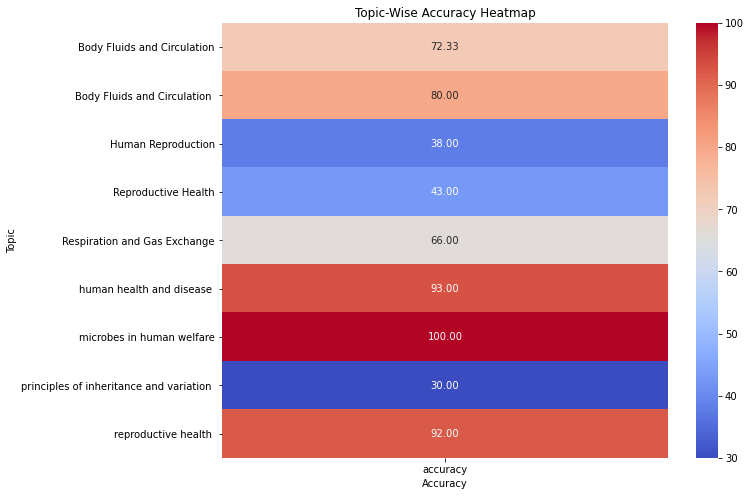

In [43]:
if 'topic' in api_df.columns:
    # Group by topic and calculate average metrics
    topic_performance = api_df.groupby('topic').agg({
        'score': 'mean',
        'accuracy': lambda x: x.str.rstrip(' %').astype(float).mean()
    }).reset_index()

    # Create a pivot table
    topic_performance_pivot = topic_performance.pivot_table(
        index='topic',  # Rows
        values='accuracy'  # Values to plot
    )

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(topic_performance_pivot, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Topic-Wise Accuracy Heatmap")
    plt.ylabel("Topic")
    plt.xlabel("Accuracy")
    plt.show()
else:
    print("The 'topic' column is still unavailable for plotting.")


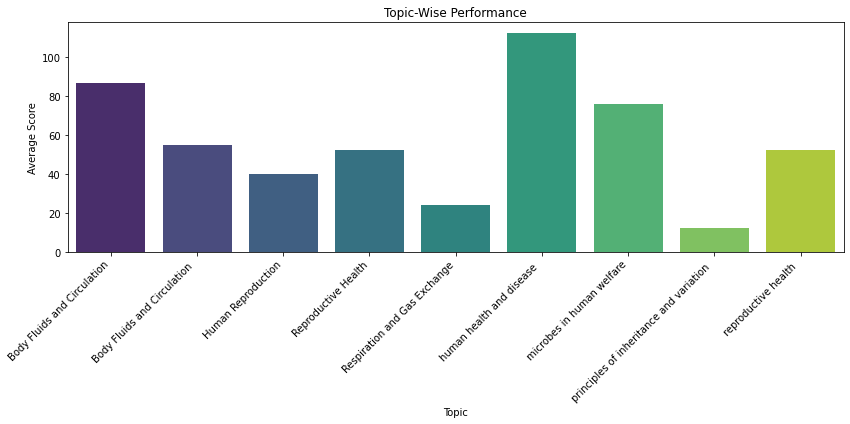

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming topic_performance is a DataFrame with 'topic' and 'score' columns
plt.figure(figsize=(12, 6))
sns.barplot(data=topic_performance, x='topic', y='score', palette="viridis")
plt.title("Topic-Wise Performance")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Score")
plt.xlabel("Topic")
plt.tight_layout()
plt.show()

### identify weak areas

In [24]:
# Identify top 3 weak topics
weak_topics = topic_performance.sort_values('score').head(4)
print("Recommended Focus Areas:")
print(weak_topics)


Recommended Focus Areas:
                                      topic  score  accuracy
7  principles of inheritance and variation    12.0      30.0
4              Respiration and Gas Exchange   24.0      66.0
2                        Human Reproduction   40.0      38.0
3                       Reproductive Health   52.0      43.0


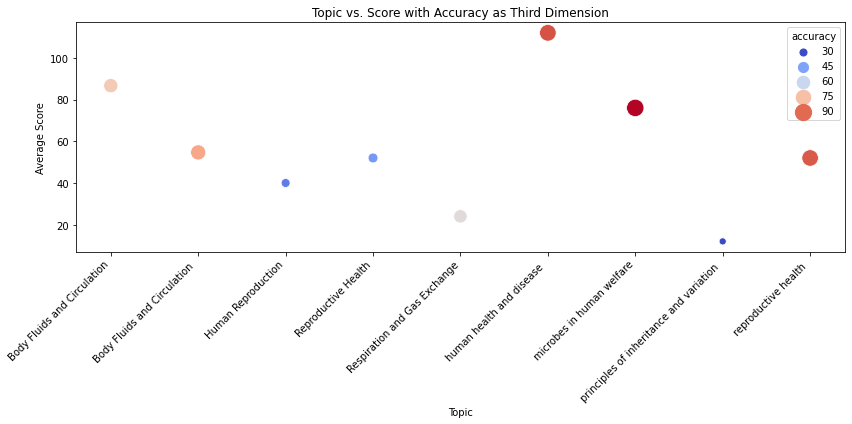

In [25]:
# Scatter plot for Topic vs. Score with Accuracy as the third dimension
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=topic_performance, 
    x='topic', 
    y='score', 
    size='accuracy', 
    hue='accuracy', 
    palette='coolwarm', 
    sizes=(50, 300)
)

# Adjust x-axis labels and title
plt.xticks(rotation=45, ha='right')
plt.title("Topic vs. Score with Accuracy as Third Dimension")
plt.ylabel("Average Score")
plt.xlabel("Topic")

# Automatically handle layout
plt.tight_layout()

# Display the plot
plt.show()


### Recommended Focus Areas:

topic:

1) principles of inheritance and variation  
2) Respiration and Gas Exchange  
3) Human Reproduction  
4) Reproductive Health


### Analyze and define the student persona based on patterns in the data.


In [30]:
print(submission_df['accuracy'].head())
print(submission_df['accuracy'].dtype)


0    80.0
Name: accuracy, dtype: float64
float64


In [31]:
# If 'accuracy' contains percentages as strings, remove '%' and convert to float
if submission_df['accuracy'].dtype == 'object':
    submission_df['accuracy'] = submission_df['accuracy'].str.rstrip(' %').astype(float)


In [32]:
submission_df['accuracy'] = pd.to_numeric(
    submission_df['accuracy'].str.rstrip(' %') if submission_df['accuracy'].dtype == 'object' else submission_df['accuracy'],
    errors='coerce'  # Converts non-convertible values to NaN
)


In [37]:
# Convert relevant columns to numeric types with robust handling
submission_df['accuracy'] = pd.to_numeric(
    submission_df['accuracy'].str.rstrip(' %') if submission_df['accuracy'].dtype == 'object' else submission_df['accuracy'],
    errors='coerce'
)
submission_df['score'] = pd.to_numeric(submission_df['score'], errors='coerce')
submission_df['speed'] = pd.to_numeric(submission_df['speed'], errors='coerce')

# Define thresholds for personas
accuracy_threshold = 80  # High accuracy
speed_threshold = 100  # Fast response time
score_threshold = 70  # High score

# Assign personas
submission_df['persona'] = submission_df.apply(
    lambda row: (
        "Consistent Performer" if row['accuracy'] >= accuracy_threshold and row['score'] >= score_threshold else
        "Speedy Solver" if row['speed'] <= speed_threshold else
        "Accuracy-Focused Learner" if row['accuracy'] >= accuracy_threshold else
        "Needs Improvement"
    ),
    axis=1
)

print("Student Personas Assigned:")
print(submission_df[['user_id', 'accuracy', 'score', 'speed', 'persona']])


Student Personas Assigned:
                        user_id  accuracy  score  speed        persona
0  7ZXdz3zHuNcdg9agb5YpaOGLQqw2      80.0     32    100  Speedy Solver


In [38]:
# Group by persona to identify strengths and weaknesses
persona_summary = submission_df.groupby('persona').agg({
    'score': 'mean',
    'accuracy': 'mean',
    'speed': 'mean',
}).reset_index()

print("Persona Summary:")
print(persona_summary)


Persona Summary:
         persona  score  accuracy  speed
0  Speedy Solver     32      80.0    100
